In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [298]:
v_s = 4 
g1 = 1.0
g2 = 1.0
g3 = 1/0.5
g4 = 1/0.2
I_sat = 1e-12 # Reverse Saturation Current
q = 1.6e-19 # Charge on an electron
eta = 1 # non-ideality factor
K = 1.38e-23 # Boltzman's Constant
T = 300 # Absolute Temperature

v_t = (K*T)/q

vd0 = 0.7 # initial guess


In [299]:
def diode_current(v_d):
    return I_sat*(np.exp(v_d/(eta*v_t)) -1)

def newton_raphson(init_val, err = 1e-6, iter = 10000):
    vd = init_val
    vds = list()
    i_ds = list()
    for i in range(iter):
        vds.append(vd)
        i_d = diode_current(vd) - vd*(I_sat/(eta*v_t))*(np.exp(vd/(eta*v_t)))
        gd = (I_sat/(eta*v_t))*(np.exp(vd/(eta*v_t)))
        G = np.matrix([[g1, -g1, 0, 1], [-g1, g1+g2+g3+gd, -g3, 0], [0, -g3, g3+g4, 0], [1, 0, 0, 0]], dtype=object).astype(float)
        b = np.matrix([0, -i_d, 0, v_s], dtype = object).T.astype(float)
        x = np.linalg.solve(G,b)
        vd_new = float(x[1])
        i_ds.append(float(b[1]))
        if abs(vd - vd_new) <= err:
            return x, i, vds, i_ds
        vd = vd_new
    return "Failed to Converge in spsecified iteration"

****************************************************************
Voltage at Node 1 (V1): 4.0 Volts
Voltage at Node 2 (V2): 0.726 Volts
Voltage at Node 3 (V3): 0.207 Volts
Source Current    (Is): -3.274 Ampere
****************************************************************


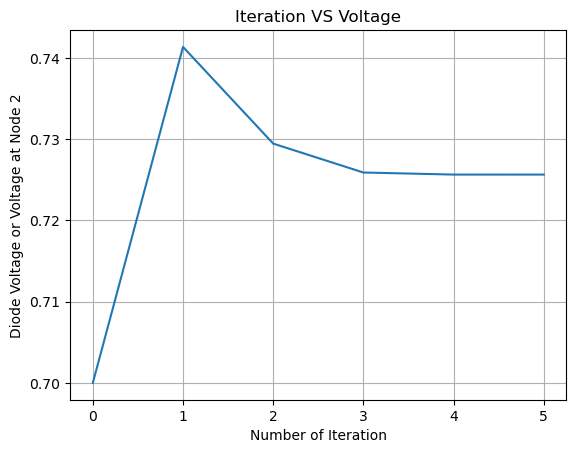

In [300]:
x, i , vds, i_ds = newton_raphson(vd0)

print("****************************************************************")
print("Voltage at Node 1 (V1): " + str(round(float(x[0]), 3)) + " Volts")
print("Voltage at Node 2 (V2): " + str(round(float(x[1]), 3)) + " Volts")
print("Voltage at Node 3 (V3): " + str(round(float(x[2]), 3)) + " Volts")
print("Source Current    (Is): " + str(round(float(x[3]), 3)) + " Ampere")
print("****************************************************************")
it = range(i+1) #np.arange(1,i+2, 1)
plt.figure()
plt.plot(it, vds)
plt.title("Iteration VS Voltage")
plt.xlabel('Number of Iteration')
plt.ylabel("Diode Voltage or Voltage at Node 2")
plt.grid(True)
plt.show()


In [286]:
'''
Vd_values = np.linspace(0.0, 1, 100)
Id_values = [diode_current(Vd) for Vd in Vd_values]
id_linear = [diode_current(v) for v in vds]
plt.plot(Vd_values, Id_values, label = "Diode Non linear character")
plt.plot(vds,id_linear, label = "DIode Linearlized")
plt.legend()'''

'\nVd_values = np.linspace(0.0, 1, 100)\nId_values = [diode_current(Vd) for Vd in Vd_values]\nid_linear = [diode_current(v) for v in vds]\nplt.plot(Vd_values, Id_values, label = "Diode Non linear character")\nplt.plot(vds,id_linear, label = "DIode Linearlized")\nplt.legend()'